<a href="https://colab.research.google.com/github/NoxFort1/fake-news-detector/blob/main/notebooks/01_data_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re

In [3]:
fake_df = pd.read_csv('Fake.csv')
true_df = pd.read_csv('True.csv')

In [4]:
fake_df.shape

(23481, 4)

In [5]:
fake_df.dtypes

title      object
text       object
subject    object
date       object
dtype: object

In [6]:
true_df.shape

(21417, 4)

In [7]:
true_df.dtypes

title      object
text       object
subject    object
date       object
dtype: object

In [8]:
fake_df['is_true'] = 0
true_df['is_true'] = 1

df = pd.concat([fake_df, true_df], ignore_index = True)
df.head()

title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  is_true  
0  December 31, 2017        0  
1  December 31, 2017        0  
2  December 30, 2017        0  
3  December 29, 2017        0  
4  December 25, 2017        0

In [9]:
df['subject'].unique()

array(['News', 'politics', 'Government News', 'left-news', 'US_News',
       'Middle-east', 'politicsNews', 'worldnews'], dtype=object)

In [10]:
df = df.drop(['subject', 'date'], axis=1)
df.head()

title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text  is_true  
0  Donald Trump just couldn t wish all Americans ...        0  
1  House Intelligence Committee Chairman Devin Nu...        0  
2  On Friday, it was revealed that former Milwauk...        0  
3  On Christmas day, Donald Trump announced that ...        0  
4  Pope Francis used his annual Christmas Day mes...        0

In [11]:
def fix_split_contraction(text):
  text = re.sub(r"\b([A-Za-z]{2,})\s+n\s*t\b", r"\1n't", text, flags=re.IGNORECASE)
  text = re.sub(r"\b([A-Za-z]+)\s+(s|m|d|t|re|ve|ll)\b", r"\1'\2", text, flags=re.IGNORECASE)

  return text

In [12]:
WORD_RE = re.compile(r"(?:[A-Za-z]+|['’][A-Za-z]+)(?:['’][A-Za-z]+)*")

In [13]:
def count_words(text):
  text = ' '.join(text.split())
  text = fix_split_contraction(text)

  return len(WORD_RE.findall(text))

In [14]:
df['words_in_title'] = df['title'].apply(count_words)
df['words_in_text'] = df['text'].apply(count_words)

In [15]:
df.head()

title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text  is_true  words_in_title  \
0  Donald Trump just couldn t wish all Americans ...        0              12   
1  House Intelligence Committee Chairman Devin Nu...        0               8   
2  On Friday, it was revealed that former Milwauk...        0              15   
3  On Christmas day, Donald Trump announced that ...        0              14   
4  Pope Francis used his annual Christmas Day mes...        0              11   

   words_in_text  
0            470  
1            308  
2            592  
3            456  
4            420

In [16]:
print('Number of missing titles values: ', df['title'].isna().sum())
print('Number of missing texts values: ', df['text'].isna().sum())

Number of missing titles values:  0
Number of missing texts values:  0


In [17]:
duplicate = df[df.duplicated(subset = ['title', 'text'])]
duplicate.shape

(5793, 5)

In [18]:
df.drop_duplicates(subset = ['title', 'text'], inplace = True)
df.shape

(39105, 5)

In [19]:
empty_articles = df[df['words_in_text'] == 0]
empty_articles.head()

title text  is_true  \
10923  TAKE OUR POLL: Who Do You Think President Trum...             0   
11041  Joe Scarborough BERATES Mika Brzezinski Over “...             0   
11190  WATCH TUCKER CARLSON Scorch Sanctuary City May...             0   
11225  MAYOR OF SANCTUARY CITY: Trump Trying To Make ...             0   
11236  SHOCKER: Public School Turns Computer Lab Into...             0   

       words_in_title  words_in_text  
10923              15              0  
11041              19              0  
11190              13              0  
11225              13              0  
11236              13              0

In [20]:
df.drop(empty_articles.index, inplace = True)
df.shape

(38658, 5)

In [21]:
short_articles = df[df['words_in_text'] < 50]
short_articles.shape

(1236, 5)

In [22]:
long_articles = df[df['words_in_text'] > 2000]
long_articles.shape

(126, 5)

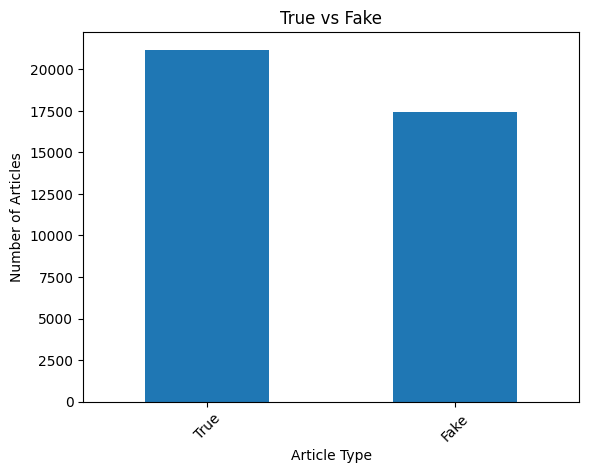

In [29]:
ax = df['is_true'].value_counts().plot(kind = 'bar')
ax.set_xticklabels(['True', 'Fake'], rotation = 45)
plt.xlabel('Article Type')
plt.ylabel('Number of Articles')
plt.title('True vs Fake')
plt.show()

In [36]:
stats = df['words_in_title'].groupby(df['is_true']).mean()
stats

is_true
0    14.520158
1    10.195556
Name: words_in_title, dtype: float64

In [41]:
title_stats = df.groupby('is_true')['words_in_title'].agg(['mean', 'median', 'std'])
title_stats

mean  median       std
is_true                             
0        14.520158    14.0  4.132536
1        10.195556    10.0  1.796046